# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 4월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do

In [2]:
# 추가 설치 
!pip install plotnine

    100% |████████████████████████████████| 3.6MB 5.4MB/s 
    100% |████████████████████████████████| 31.2MB 1.2MB/s 
    100% |████████████████████████████████| 901kB 12.2MB/s 
    100% |████████████████████████████████| 71kB 17.8MB/s 
    100% |████████████████████████████████| 1.5MB 12.2MB/s 
    100% |████████████████████████████████| 4.4MB 6.7MB/s 
    100% |████████████████████████████████| 15.8MB 2.1MB/s 
    100% |████████████████████████████████| 81kB 23.4MB/s 
    100% |████████████████████████████████| 71kB 18.8MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [5]:
%pwd
#참고 : 서버 명령어 기재시 % 입력 후 서버 명령어 활용

'/content'

In [6]:
# 로컬 파일 업로드 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 전국 평균 분양가격(2018.6월).csv to 전국 평균 분양가격(2018.6월).csv
User uploaded file "전국 평균 분양가격(2018.6월).csv" with length 105382 bytes


In [7]:
%ls -alrt

total 140
drwxr-xr-x 2 root root   4096 Aug 15 20:56 sample_data/
lrwxrwxrwx 1 root root      8 Aug 15 20:56 datalab -> /content/
drwxr-xr-x 1 root root   4096 Aug 20 07:39 ../
drwxr-xr-x 4 root root   4096 Aug 20 07:40 .forever/
drwx------ 3 root root   4096 Aug 20 07:40 .local/
drwxr-xr-x 5 root root   4096 Aug 20 07:40 .ipython/
drwxr-xr-x 1 root root   4096 Aug 20 07:40 .config/
drwx------ 4 root root   4096 Aug 20 07:40 .cache/
drwxr-xr-x 1 root root   4096 Aug 20 07:44 ./
-rw-r--r-- 1 root root 105382 Aug 20 07:44 전국 평균 분양가격(2018.6월).csv


In [8]:
pre_sale = pd.read_csv('전국 평균 분양가격(2018.6월).csv', encoding='euc-kr')
pre_sale.shape

(2805, 5)

In [9]:
pre_sale.head(3)
#참고 : 머리 - 윗 부분 자료 검색

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882


In [10]:
pre_sale.tail(10)
#참고: 꼬리 - 뒷 부분 자료 검색

,지역명,규모구분,연도,월,분양가격(㎡)
2795,경남,전체,2018,6,2695
2796,경남,전용면적 60㎡이하,2018,6,2744
2797,경남,전용면적 60㎡초과 85㎡이하,2018,6,2673
2798,경남,전용면적 85㎡초과 102㎡이하,2018,6,2857
2799,경남,전용면적 102㎡초과,2018,6,2862
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [11]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.6+ KB


In [0]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [0]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

#참고 : astype 란 Numpy 형 변환 방법: .astype(형변환타입)

In [0]:
print(pre_sale_price)
#빈 값들이 존재함

In [0]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')


# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3


#참고: pd.to_numeric , pd= pandas 의 to_numberic 활용 errors= 'coerce' : 숫자로만 변형, erros='ignore' : 에러무시함 , downcast='float' :가장 작은 float dtype , downcast='signed':  가장 작은 sign 사인 데이터

In [20]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [21]:
# 분양가격에 결측치가 많이 있어요.

pre_sale.isnull()
#참고 : insull 값이 있는 부분 False, True 로 표현

pre_sale.isnull().sum()

#참고 : insull 값이 있는 True 부분 1로 전환 후 sum 


지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [23]:
pre_sale.describe()

,분양가격,평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [24]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == 2017]
pre_sale_2017.shape

(0, 7)

In [25]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          561
전용면적 60㎡초과 85㎡이하     561
전용면적 60㎡이하           561
전체                   561
전용면적 85㎡초과 102㎡이하    561
Name: 규모구분, dtype: int64

# 전국평균 분양가격

In [26]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    456
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,199
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,470
       50%    2,516  2,672  2,849  2,912
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    456
       mean   9,203  9,683 10,360 10,888
       std    3,224  3,536  3,655  3,958
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,153
       50%    8,303  8,818  9,402  9,611
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [28]:
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"
5,인천,전체,2015,10,3163,"3,163","10,438"
6,인천,전용면적 60㎡이하,2015,10,3488,"3,488","11,510"
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119,"3,119","10,293"
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545,"3,545","11,698"
9,인천,전용면적 102㎡초과,2015,10,3408,"3,408","11,246"


## 규모별 전국 평균 분양가격

In [27]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [32]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()


#region_year_all
#참조 loc 는 인덱싱 규모구분 == 전체인 데이터만 저회

#region_year
#년도, 지역으로 정렬 reset_index란 - 재정렬 


연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [35]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)

#금액인 "천원" 단위이르모 "원 단위로 변경"
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년~2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년~2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 387,000원이다.
전국 평균 변동액은 평당 1,666,647원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,643",482
1,경기,"10,377","11,220","11,850","12,854",2476
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,262",1090
4,광주,"8,052","8,899","9,464","9,630",1577
5,대구,"9,232","10,310","11,456","11,652",2419
6,대전,"8,098","8,502","9,045","9,589",1490
7,부산,"10,307","10,430","11,578","12,710",2402
8,서울,"19,725","20,663","21,376","22,299",2574
9,세종,"8,750","8,860","9,135","10,382",1631


# 연도별 변동 그래프

In [112]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

print(f)

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

버전:  2.1.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /content/.config/matplotlib
캐시 위치:  /content/.cache/matplotlib
설정 파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc
65
['STIXSizeThreeSym', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeOneSym', 'cmsy10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'cmb10', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmmi10', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Serif Display', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXNonUnicode', 'cmr10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXSizeFiveSym', 'DejaVu Serif', 'DejaVu Sans Display', 'cmtt10', 'DejaVu Sans', 'DejaVu Sans', 'cmex10', 'STIXSizeTwoSym', 'DejaVu Serif', 'cmss10', 'DejaVu Serif', 'Liberation Sans', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif'

[]

In [58]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 36.0 MB of archives.
After this operation, 140 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum all 20161025-1 [9,129 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum-extra all 20161025-1 [11.7 MB]
Get:4 http://archive.ubuntu.com/u

In [65]:
!fc-cache -f -v

/bin/sh: 1: fc-cache: not found


In [97]:
!ls -alrt /usr/share/fonts/truetype/nanum/

total 136992
-rw-r--r-- 1 root root  7024632 Oct 29  2011 NanumMyeongjoEco.ttf
-rw-r--r-- 1 root root 10635180 Oct 29  2011 NanumMyeongjoEcoExtraBold.ttf
-rw-r--r-- 1 root root  9809868 Oct 29  2011 NanumMyeongjoEcoBold.ttf
-rw-r--r-- 1 root root  7783984 Oct 29  2011 NanumGothicEco.ttf
-rw-r--r-- 1 root root 11571064 Oct 29  2011 NanumGothicEcoExtraBold.ttf
-rw-r--r-- 1 root root 11021172 Oct 29  2011 NanumGothicEcoBold.ttf
-rw-r--r-- 1 root root  1800792 Oct 21  2016 NanumGothicCoding-Bold.ttf
-rw-r--r-- 1 root root  2779112 Oct 21  2016 NanumGothicCoding.ttf
-rw-r--r-- 1 root root   723640 Feb 20  2017 NanumSquareR.ttf
-rw-r--r-- 1 root root   750932 Feb 20  2017 NanumSquareL.ttf
-rw-r--r-- 1 root root   726684 Feb 20  2017 NanumSquareEB.ttf
-rw-r--r-- 1 root root   733500 Feb 20  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root  3548656 Feb 20  2017 NanumPen.ttf
-rw-r--r-- 1 root root  3839464 Feb 20  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  4788696 Feb 20  2017 NanumMyeongjoExtr

In [100]:
!ls -alrt /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

total 143816
-rw-r--r-- 1 root staff    15704 Aug 15 20:47 STIXSizTwoSymReg.ttf
-rw-r--r-- 1 root staff    12116 Aug 15 20:47 STIXSizTwoSymBol.ttf
-rw-r--r-- 1 root staff    15836 Aug 15 20:47 STIXSizThreeSymReg.ttf
-rw-r--r-- 1 root staff    19760 Aug 15 20:47 STIXSizOneSymReg.ttf
-rw-r--r-- 1 root staff    12556 Aug 15 20:47 STIXSizOneSymBol.ttf
-rw-r--r-- 1 root staff    15972 Aug 15 20:47 STIXSizFourSymReg.ttf
-rw-r--r-- 1 root staff    12228 Aug 15 20:47 STIXSizFourSymBol.ttf
-rw-r--r-- 1 root staff    13656 Aug 15 20:47 STIXSizFiveSymReg.ttf
-rw-r--r-- 1 root staff    59108 Aug 15 20:47 STIXNonUni.ttf
-rw-r--r-- 1 root staff    46752 Aug 15 20:47 STIXNonUniIta.ttf
-rw-r--r-- 1 root staff    30512 Aug 15 20:47 STIXNonUniBol.ttf
-rw-r--r-- 1 root staff    41272 Aug 15 20:47 STIXNonUniBolIta.ttf
-rw-r--r-- 1 root staff   175040 Aug 15 20:47 STIXGeneralItalic.ttf
-rw-r--r-- 1 root staff   237360 Aug 15 20:47 STIXGeneralBol.ttf
-rw-r--r-- 1 root staff   181152 Aug 15 20:47 STIXGeneral

In [0]:
!cp /usr/share/fonts/truetype/nanum/*.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [126]:
# 기본 설정 읽기
import matplotlib.pyplot as plt



#NanumGothic = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')


for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print("{}: {}".format(key, plt.rcParamsDefault[key]))
        
        
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 10      


# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'ImpactWestern', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
mathtext.fontset: dejavusa

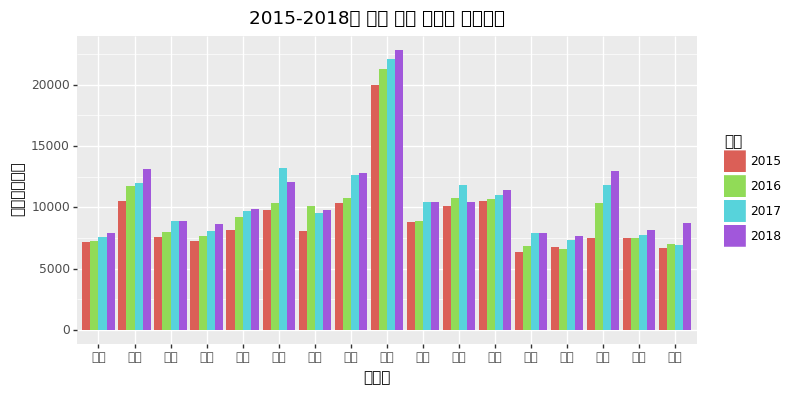

<ggplot: (8767699048477)>

In [131]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family= 'NanumBarunGothic'),
         figure_size=(8, 4))
)

# 한글이 깨짐 

## 지역별 평당 분양가격 합계
* 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
* 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [37]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,871","13,601","9,222","8,586","10,381","12,303","14,282","12,584","22,035","9,259","9,974","13,836","7,550","7,793","10,435","8,477","7,900"
전용면적 60㎡이하,"7,185","12,300","8,320","7,646","8,494","11,254","8,816","10,656","21,976","9,071","8,965","10,853","6,980","7,184","14,700","7,772","6,951"
전용면적 60㎡초과 85㎡이하,"7,216","11,650","8,088","7,657","9,159","10,889","8,779","11,135","20,718","9,237","10,651","10,719","6,943","6,868","9,908","7,484","7,019"
전용면적 85㎡초과 102㎡이하,"7,612","12,029","9,834","8,776","9,296","9,497","9,037","10,971","23,714","9,210","8,861","11,286","7,858","7,739","10,744","9,102","8,145"
전체,"7,183","11,664","8,113","7,661","9,151","10,854","8,854","11,241","21,127","9,230","10,628","10,727","6,958","6,877","10,230","7,474","6,966"


## 규모별 

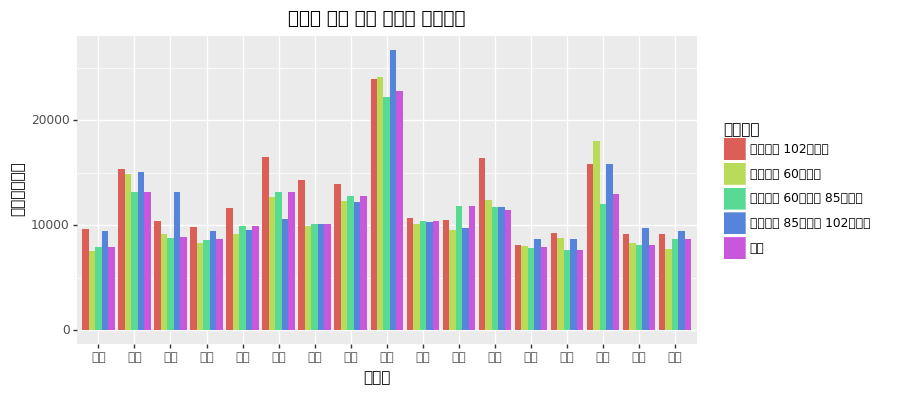

<ggplot: (-9223363269157908476)>

In [38]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

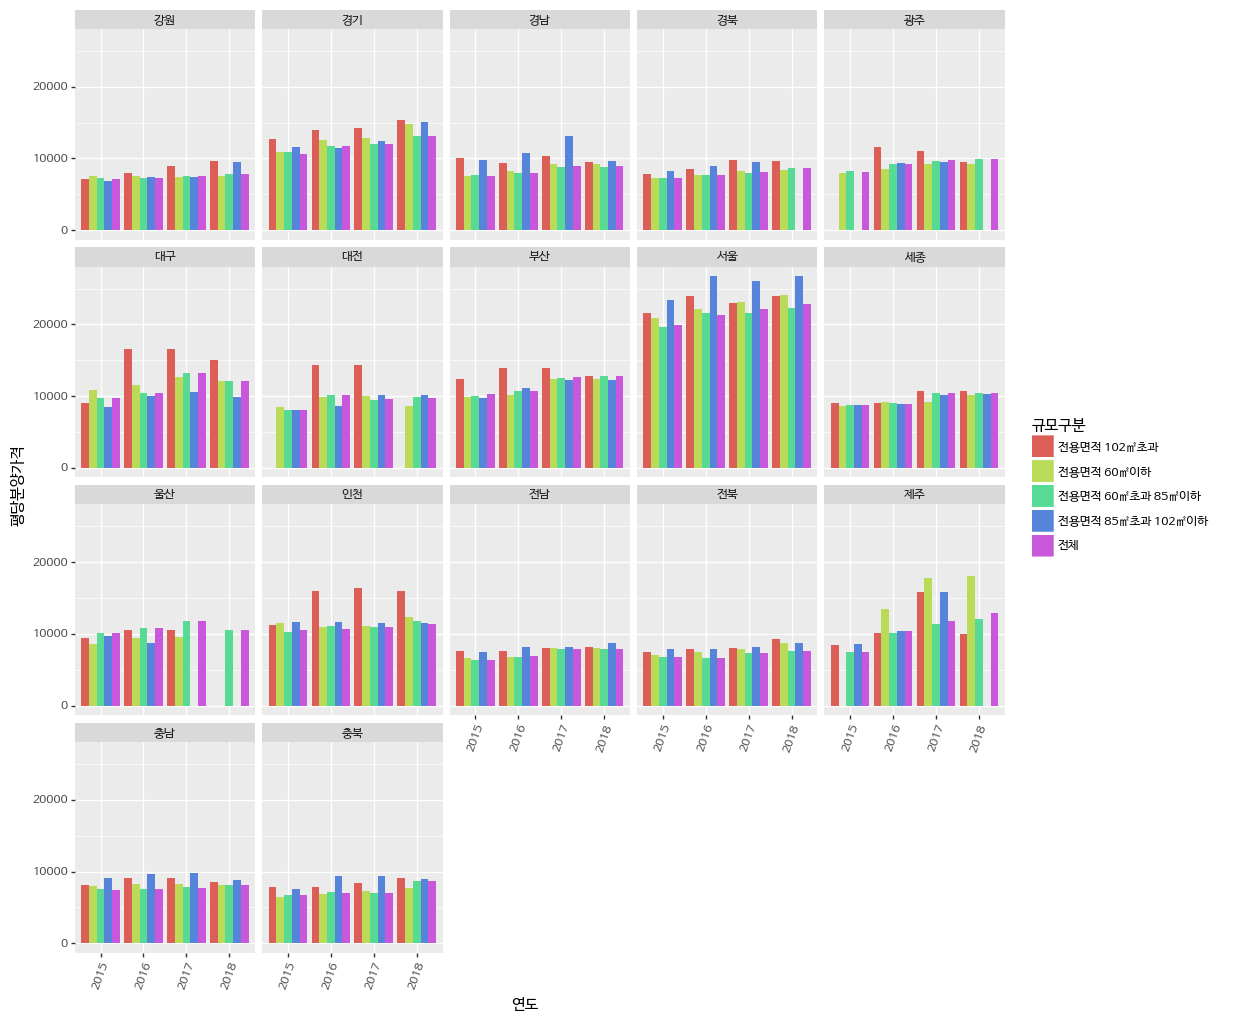

<ggplot: (-9223372036564755319)>

In [0]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

In [0]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

In [0]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

# 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.

In [0]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

In [0]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

In [0]:
year = df.iloc[0]
month = df.iloc[1]

In [0]:
# 결측치를 채워준다.
year

In [0]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = '2014년 ' + month[i]
    elif i >= 15:
        year[i] = '2015년 ' + month[i]
    elif i == 2 :
        year[i] =  year[i] + ' ' + month[i]
    elif i == 1:
        year[i] = '시군구'
        
print(year)

In [0]:
df.columns = year

In [0]:
df = df.drop(df.index[[0,1]])
df

In [0]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [0]:
df['지역'] = df['구분'] + df['시군구']

In [0]:
df['지역']

In [0]:
melt_columns = df.columns.copy()
melt_columns

In [0]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

In [0]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

In [0]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [0]:
df_2013_2015.head()

## 지역명 강원과 부산 정리

In [0]:
df_2013_2015['지역'].value_counts()

In [0]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

In [0]:
df_2013_2015.describe()

In [0]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

In [0]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

In [0]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

## 이제 2013년부터 2018년 4월까지 데이터를 합칠 준비가 됨

In [0]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

In [0]:
df_2013_2015.columns

In [0]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

In [0]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [0]:
df_2015_2018.columns

In [0]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

In [0]:
df_2015_2018_prepare.describe()

In [0]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

In [0]:
df_2013_2018.head()

In [0]:
df_2013_2018.tail()

In [0]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

In [0]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

In [0]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

In [0]:
df_2013_2018.shape

In [0]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

In [0]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

In [0]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

In [0]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)